In [1207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [1208]:
df = pd.read_csv(r'C:\Users\YUCHENG WANG\Desktop\MBAN Summer\MBAN6110\Data\kc_house_data.csv')

In [1209]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


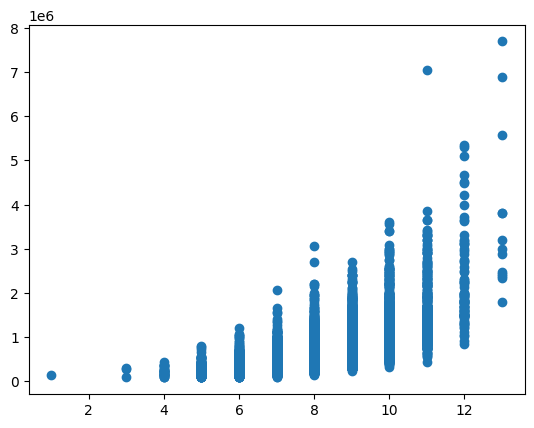

In [1210]:
plt.scatter(df['grade'],df['price'])

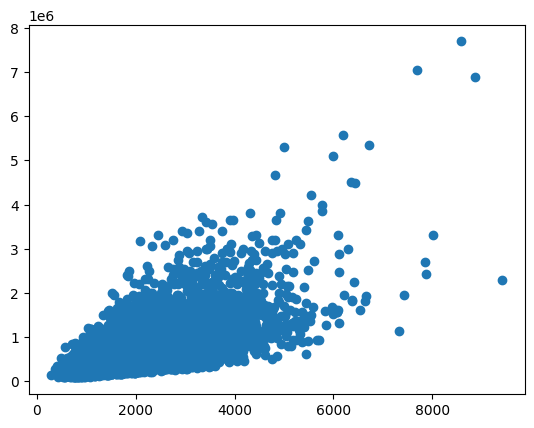

In [1211]:
plt.scatter(df['sqft_above'],df['price'])

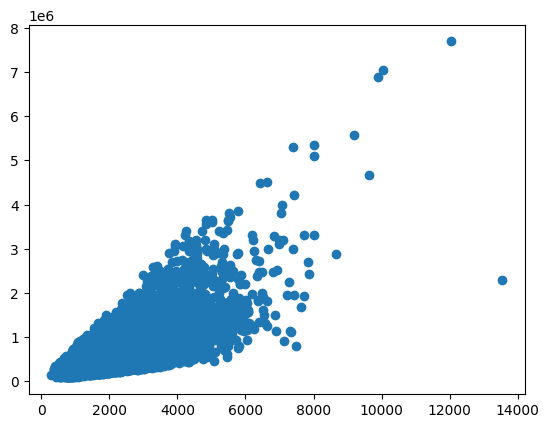

In [1212]:
plt.scatter(df['sqft_living'],df['price'])

All three graph illustrated that this data may not follow a normal distribution, so for ensuring the precise of the model, I decide to convert some variables into the log type to make the model follow a normal distribution.

In [1213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [1214]:
numeric_columns = df.select_dtypes(include=np.number).columns
corr = df[numeric_columns].corr()['price'].sort_values()

In [1215]:
corr

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [1216]:
results = ols('price ~ sqft_living+grade+sqft_above+sqft_living15+bathrooms+view+sqft_basement+bedrooms+lat+waterfront+floors+yr_renovated+sqft_lot+sqft_lot15+yr_built+condition+long+id+zipcode', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:26:27   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.939e+06   2.93e+06      2.366

In [1217]:
'y_hat =  6.939e+06+120.2134lsqft_living+9.601e+04grade+60.8739sqft_above+21.6256sqft_living15+4.116e+04bathrooms+5.303e+04view+29.8905sqft_basement-3.576e+04bedrooms+6.024e+05lat+5.827e+05waterfront+6764.7563floors+19.6458yr_renovated+0.1218sqft_lot-0.3964sqft_lot15-2622.2522yr_built+2.625e+04condition-2.128e+05long-1.289e-06id-582.2481zipcode'

'y_hat =  6.939e+06+120.2134lsqft_living+9.601e+04grade+60.8739sqft_above+21.6256sqft_living15+4.116e+04bathrooms+5.303e+04view+29.8905sqft_basement-3.576e+04bedrooms+6.024e+05lat+5.827e+05waterfront+6764.7563floors+19.6458yr_renovated+0.1218sqft_lot-0.3964sqft_lot15-2622.2522yr_built+2.625e+04condition-2.128e+05long-1.289e-06id-582.2481zipcode'

In [1218]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1219]:
pred_vals = results.predict(df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat','waterfront','floors','yr_renovated','sqft_lot','sqft_lot15','yr_built','condition','long','id','zipcode']])

In [1220]:
pred_vals

0        205766.264666
1        731219.649897
2        379097.882720
3        457424.134414
4        444789.054803
             ...      
21608    488773.827312
21609    435781.717986
21610    147504.224319
21611    391445.319394
21612    150170.074775
Length: 21613, dtype: float64

In [1221]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [1222]:
res

,y_hat,price
0,205766.264666,221900.0
1,731219.649897,538000.0
2,379097.882720,180000.0
3,457424.134414,604000.0
4,444789.054803,510000.0
...,...,...
21608,488773.827312,360000.0
21609,435781.717986,400000.0
21610,147504.224319,402101.0
21611,391445.319394,400000.0


In [1223]:
res['error'] = res['y_hat'] - res['price']

In [1224]:
res.head(1)

,y_hat,price,error
0,205766.264666,221900.0,-16133.735334


In [1225]:
res['sq_error'] = res['error']**2

In [1226]:
mse = res['sq_error'].mean()

In [1227]:
print(mse)

40453550945.55063


In [1228]:
np.sqrt(res['sq_error'].mean())

201130.68126357705

In [1229]:
print(res['sq_error'])
print(res['sq_error'].describe())

0        2.602974e+08
1        3.733383e+10
2        3.963997e+10
3        2.148448e+10
4        4.252467e+09
             ...     
21608    1.658270e+10
21609    1.280331e+09
21610    6.481952e+10
21611    7.318256e+07
21612    3.056550e+10
Name: sq_error, Length: 21613, dtype: float64
count    2.161300e+04
mean     4.045355e+10
std      2.777806e+11
min      4.173487e+01
25%      1.727081e+09
50%      7.830401e+09
75%      2.580993e+10
max      1.880440e+13
Name: sq_error, dtype: float64


In [1230]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


(array([3.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00, 1.7000e+01,
        8.2000e+01, 4.4000e+02, 1.8281e+04, 2.7620e+03, 2.0000e+01]),
 array([-4336403.899144  , -3773159.21409624, -3209914.52904847,
        -2646669.8440007 , -2083425.15895294, -1520180.47390517,
         -956935.7888574 ,  -393691.10380964,   169553.58123813,
          732798.2662859 ,  1296042.95133366]),
 <BarContainer object of 10 artists>)

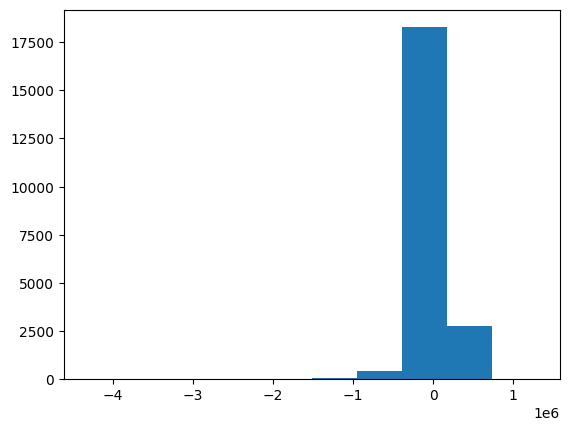

In [1231]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

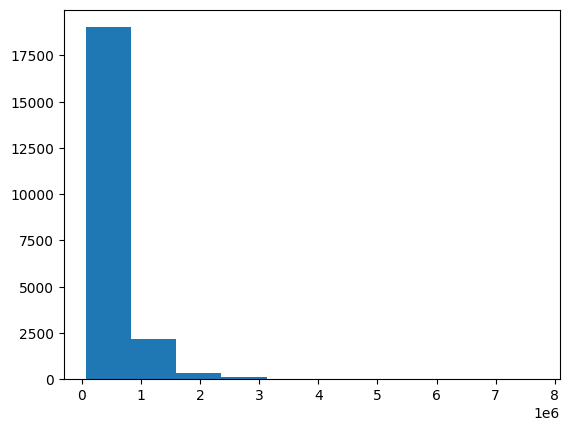

In [1232]:
plt.hist(df['price'])

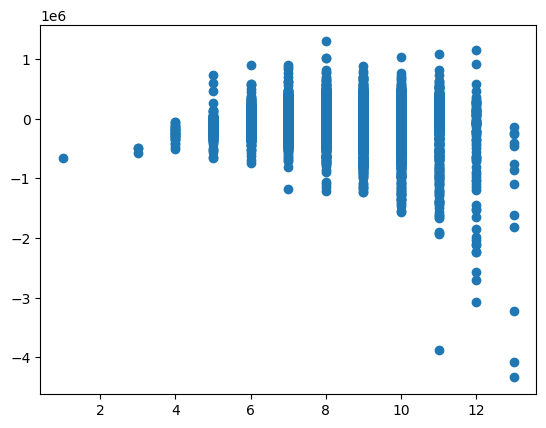

In [1233]:
plt.scatter(df['grade'],res['error'])

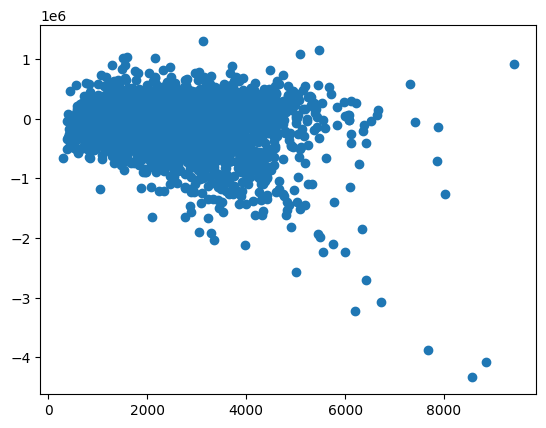

In [1234]:
plt.scatter(df['sqft_above'],res['error'])

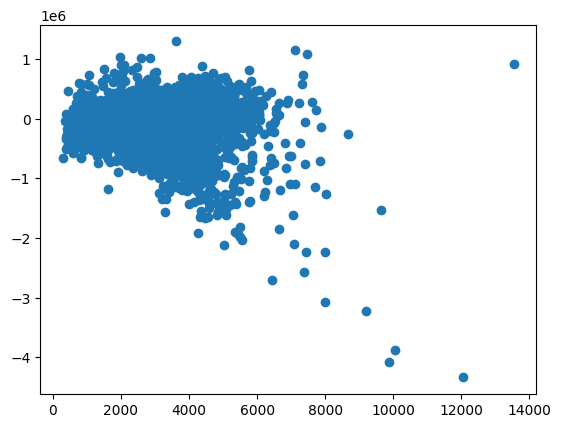

In [1235]:
plt.scatter(df['sqft_living'],res['error'])

After take the log, all three residual plot shows nearly unbiased and homoskedasiticity.

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4336403.899144  , -4084925.59455365, -3870415.68241837, ...,
          1092925.93436335,  1160956.72966571,  1296042.95133366])),
 (179474.99787355494, 7.291327119869538e-05, 0.8921714455763323))

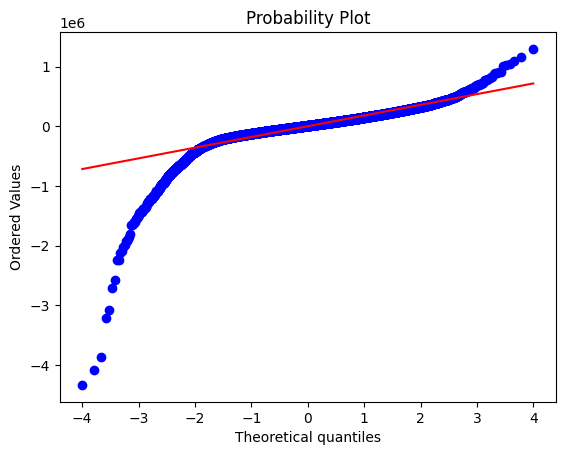

In [1236]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

After we take the log, now the QQ plot denote that this model is nearly follow a normally distribution.

In [1237]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_sqft_living  dfb_grade  dfb_sqft_above   
0          -0.000938         1.024260   0.000441       -0.992388  \
1           0.004343         2.153918   0.011379       -2.095513   
2          -0.007959         7.918433   0.010908       -7.665551   
3          -0.006955         4.790142  -0.001192       -4.643584   
4          -0.000088        10.760641   0.002415      -10.426647   
...              ...              ...        ...             ...   
21608       0.000955         5.836936  -0.000438       -5.652076   
21609       0.002551         3.366054   0.000449       -3.262009   
21610      -0.011126        -0.253157   0.000398        0.249841   
21611       0.000364        -7.689060   0.000281        7.449917   
21612      -0.007518        -5.270969   0.000341        5.110241   

       dfb_sqft_living15  dfb_bathrooms  dfb_view  dfb_sqft_basement   
0              -0.000232      -0.000482 -0.000088          -1.063404  \
1               0.002034       0.004149

In [1238]:
infl.summary_frame()

,dfb_Intercept,dfb_sqft_living,dfb_grade,dfb_sqft_above,dfb_sqft_living15,dfb_bathrooms,dfb_view,dfb_sqft_basement,dfb_bedrooms,dfb_lat,...,dfb_condition,dfb_long,dfb_id,dfb_zipcode,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000938,1.024260,0.000441,-0.992388,-0.000232,-0.000482,-0.000088,-1.063404,0.000310,-0.000440,...,-0.000345,0.000467,0.000464,0.001149,1.554277e-07,0.080199,0.000483,0.001763,0.080197,0.001763
1,0.004343,2.153918,0.011379,-2.095513,0.002034,0.004149,0.003388,-2.243763,0.006064,-0.007479,...,-0.000808,0.003881,-0.005068,-0.000611,6.861570e-05,-0.960958,0.001484,-0.037045,-0.960956,-0.037045
2,-0.007959,7.918433,0.010908,-7.665551,-0.023084,-0.001675,0.001904,-8.213770,0.005497,-0.010032,...,0.007602,0.006307,-0.002593,0.011566,5.477706e-05,-0.990011,0.001117,-0.033099,-0.990010,-0.033099
3,-0.006955,4.790142,-0.001192,-4.643584,-0.001987,0.010154,-0.002630,-4.973108,0.001018,-0.001950,...,0.011338,-0.002777,-0.003219,0.005050,2.183881e-05,0.728738,0.000822,0.020899,0.728731,0.020899
4,-0.000088,10.760641,0.002415,-10.426647,-0.001616,0.000913,0.000177,-11.171717,-0.000090,0.001009,...,-0.001096,0.003155,-0.002313,0.001468,2.201259e-06,0.324147,0.000419,0.006635,0.324140,0.006635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.000955,5.836936,-0.000438,-5.652076,0.000561,0.000479,-0.000085,-6.059015,-0.000311,-0.003857,...,-0.000771,0.003436,0.006769,0.001588,1.656662e-05,-0.640227,0.000808,-0.018203,-0.640218,-0.018202
21609,0.002551,3.366054,0.000449,-3.262009,0.000333,0.000447,0.000229,-3.493638,-0.000942,0.000401,...,-0.000274,0.001446,-0.000912,-0.001557,7.814475e-07,-0.177869,0.000494,-0.003953,-0.177865,-0.003953
21610,-0.011126,-0.253157,0.000398,0.249841,-0.006697,-0.023738,0.001849,0.273521,-0.002946,0.002548,...,0.003362,-0.001030,-0.009596,0.008252,7.041902e-05,1.265827,0.000878,0.037528,1.265845,0.037529
21611,0.000364,-7.689060,0.000281,7.449917,-0.000381,0.000186,0.000081,7.981365,-0.000054,0.000003,...,-0.000102,0.000304,-0.000487,-0.000178,4.403158e-08,0.042525,0.000487,0.000938,0.042524,0.000938


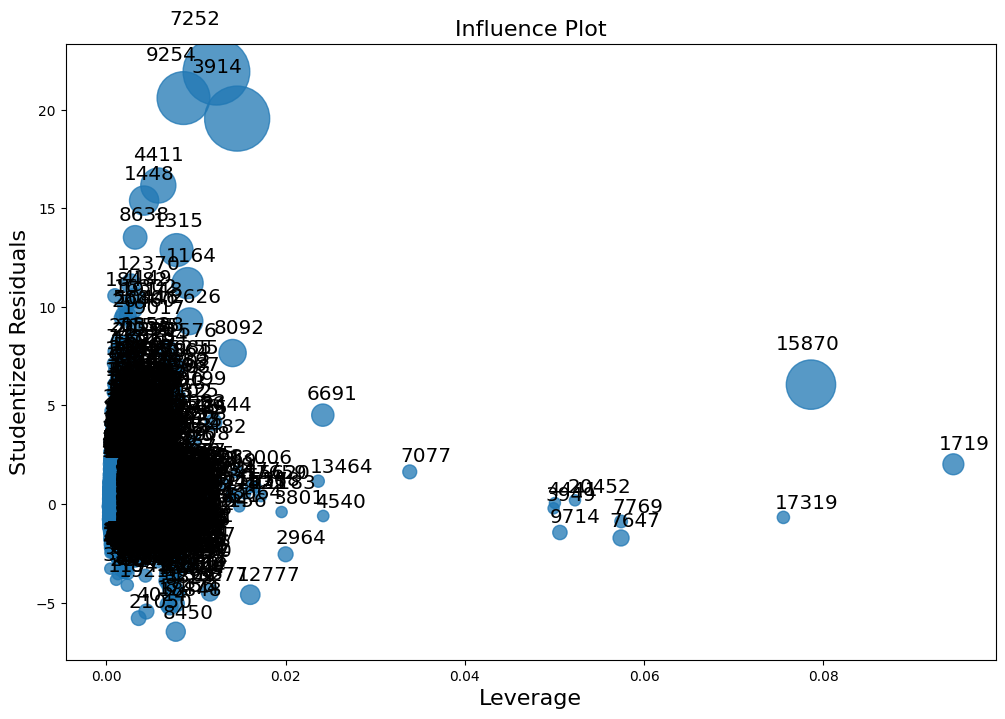

In [1239]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [1240]:
res

,y_hat,price,error,sq_error
0,205766.264666,221900.0,-16133.735334,2.602974e+08
1,731219.649897,538000.0,193219.649897,3.733383e+10
2,379097.882720,180000.0,199097.882720,3.963997e+10
3,457424.134414,604000.0,-146575.865586,2.148448e+10
4,444789.054803,510000.0,-65210.945197,4.252467e+09
...,...,...,...,...
21608,488773.827312,360000.0,128773.827312,1.658270e+10
21609,435781.717986,400000.0,35781.717986,1.280331e+09
21610,147504.224319,402101.0,-254596.775681,6.481952e+10
21611,391445.319394,400000.0,-8554.680606,7.318256e+07


In [1241]:
# Function to create 'basement' column
def add_basement_column(df):
    df['basement'] = df['sqft_basement'].apply(lambda x: '1' if x > 0 else '0').astype(int)
    return df

# Function to create 'house-year' column
def add_house_year_column(df):
    df['date'] = pd.to_datetime(df['date'])  
    df['house_year'] = df['date'].dt.year - df['yr_built']
    return df

# Function to create 'renovated' column
def add_renovated_column(df):
    df['renovated'] = df['yr_renovated'].apply(lambda x: '1' if x > 0 else '0').astype(int)
    return df

df = add_basement_column(df)
df = add_house_year_column(df)
df = add_renovated_column(df)

In [1242]:
# convert to date
df['date'] = pd.to_datetime(df['date'])

In [1243]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,house_year,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,0,5,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,0,1,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,0,5,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,0,11,0


In [1244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [1245]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1246]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [1247]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,house_year,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,28,0
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,1,13,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,0,19,0
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,0,52,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,1,55,0
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,0,12,0


In [1248]:
# separate features and target
categorical_features = ['grade','condition', 'view','basement','waterfront','renovated']
numerical_features = ['bathrooms','sqft_living', 'bedrooms','house_year' , 'sqft_above' , 'sqft_living15','floors','lat','long','sqft_lot','sqft_lot15']
target = 'price'

In [1249]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [1250]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [1251]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [1252]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [1253]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'basement', 'waterfront',
                                                   'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'sqft_living',
                                                   'bedrooms', 'house_year',
                                                   'sqft_above',
                                                   'sqft_living15', 'floors',
                                                   'lat', 'long', 'sqft_lot',
                                                   'sqft_lot15'])])),
                ('regressor', LinearRegression())])

In [1254]:
pred = linear_regression.predict(X_test)

In [1255]:
pred

array([ 459264.,  429824., 1171200., ...,  416000.,  541440.,  450304.])

In [1256]:
from sklearn.metrics import mean_squared_error

In [1257]:
np.sqrt(mean_squared_error(pred,y_test))

516537287266659.2

In [1258]:
mean_squared_error(pred, y_test)

2.668107691367992e+29

In [1259]:
r_squared = linear_regression.score(X_test, y_test)

In [1260]:
print(r_squared)

-2.0539985787893947e+18


In [1261]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [1262]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'basement', 'waterfront',
                                                   'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'sqft_living',
                                                   'bedrooms', 'house_year',
                                                   'sqft_above',
                                                   'sqft_living15', 'floors',
                                                   'lat', 'long', 'sqft_lot',
                                                   'sqft_lot15'])])),
                ('regressor', Ridge(alpha=3.0))])

In [1263]:
pred_ridge = ridge_regression.predict(X_test)

In [1264]:
mean_squared_error(pred_ridge, y_test)

36970234474.11399

In [1265]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

192276.45324925773

In [1266]:
from sklearn.metrics import r2_score

In [1267]:
r2 = r2_score(pred_ridge,y_test)

In [1268]:
print(r2)

0.6382248162317211


In [1269]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [1270]:
lasso_regression.fit(X_train, y_train)

d:\python3.11\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+12, tolerance: 2.071e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'basement', 'waterfront',
                                                   'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'sqft_living',
                                                   'bedrooms', 'house_year',
                                                   'sqft_above',
                                                   'sqft_living15', 'floors',
                                                   'lat', 'long', 'sqft_lot',
                                                   'sqft_lot15'])])),
                ('regressor', Lasso())])

In [1271]:
lasso_pred = lasso_regression.predict(X_test)

In [1272]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

192357.07996716973

In [1273]:
mean_squared_error(lasso_pred, y_test)

37001246213.49613

In [1274]:
r2 = r2_score(lasso_pred,y_test)

In [1275]:
print(r2)

0.6443041764114303


In [1276]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [1277]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'basement', 'waterfront',
                                                   'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'sqft_living',
                                                   'bedrooms', 'house_year',
                                                   'sqft_above',
                                                   'sqft_living15', 'floors',
                                                   'lat', 'long', 'sqft_lot',
                                                   'sqft_lot15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [1278]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [1279]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

215429.15341199297

In [1280]:
mean_squared_error(elasticnet_pred, y_test)

46409720139.808

In [1281]:
r2 = r2_score(elasticnet_pred,y_test)

In [1282]:
print(r2)

0.3464560797771734


Question 1 and 2
After implementing the scatter plot using several variables such as 'grade', 'sqft_above', and 'sqft_living' on the target variable 'price', we discovered that this dataset does not follow a normal distribution. 

Initially, we conducted a correlation analysis between the target variable 'price' and all other independent variables. We identified several variables with a strong correlation to 'price,' including 'sqft_living', 'grade', and 'sqft_above'. Subsequently, we applied logarithmic transformation to the variables 'price', 'sqft_living', 'sqft_above', and 'sqft_living15'. We then performed separate analyses with all variables on target variable 'price' using the OLS, Lasso, Ridge, and Elastic Net models.

Ultimately, our findings indicate that the Ridge model is the most suitable approach for the provided data. We arrived at this conclusion by comparing the mean squared error (MSE) and r-squared values obtained from these three models. The MSE and r-squared values serve as indicators of the model's precision.

Specifically, the OLS model yielded a  MSE of 40453550945.55063 and an r-squared value of 0.731. The Ridge regression produced an MSE of 36970234474.11399 with an r-squared value of 0.64. In the case of Lasso and Elastic Net regression, lasso had an MSE value of 37001246213.49613 and an r-squared value of 0.64; Elastic Net had an MSE value of 46409720139.808 and an r-squared value of 0.35 Considering these results, we selected the model with the smallest MSE and the largest r-squared value, which is the Ridge model.

It is important to note that different variable choices can lead to different results in this dataset. Additionally, in specific situations, any of OLS, Lasso, or Elastic Net may be the best model. The aforementioned answer represents the best model, Ridge regression, after applying the variable filtering process.


Question 3
After comparing the coefficients of variables in the OLS model, it can be concluded that latitude, waterfront,longtitude, grade,view, bathrooms, condition are the primary factors that influence house prices in King City. By examining their coefficients, we can observe the following relationships:

Increasing the latitude by one unit results in a  6.024e+05 increase in the  house price, so the location of the house may affect the most on its price.
Additionally, when waterfront status is upgraded by one unit, the house price increases by 5.827e+05 .
Increasing the longtitude by one unit results in a  2.128e+05 decrease in the  house price increase in the house price.
With one more bathroom in the house, the house price increases by 4.116e+04.
upgrading the grade by one level results in a  9.601e+04 increase in the  house price.
Furthermore,Increasing the view by one unit leads to a 5.303e+04 increase in the house price.


Therefore, these variables exhibit significant influence on house prices in King City, as evidenced by their respective coefficients in the OLS model.

